In [1]:
import pandas as pd        #importing required libraries
import matplotlib as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [2]:
water_data = pd.read_csv('water_potability.csv')
water_data.head()        # View first 5 rows

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
0,NaN,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135,0
1,3.716080,129.422921,18630.057858,6.635246,NaN,592.885359,15.180013,56.329076,4.500656,0
2,8.099124,224.236259,19909.541732,9.275884,NaN,418.606213,16.868637,66.420093,3.055934,0
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771,0
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075,0


In [61]:
water_data.columns      #listing the columns names

Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [62]:
water_data.shape  #noofrowsandcoloums present in dataset


(3276, 10)

In [63]:
water_data.dtypes    #typeofdata

ph                 float64
Hardness           float64
Solids             float64
Chloramines        float64
Sulfate            float64
Conductivity       float64
Organic_carbon     float64
Trihalomethanes    float64
Turbidity          float64
Potability           int64
dtype: object

In [64]:
water_data.info()    #summary info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3276 entries, 0 to 3275
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ph               2785 non-null   float64
 1   Hardness         3276 non-null   float64
 2   Solids           3276 non-null   float64
 3   Chloramines      3276 non-null   float64
 4   Sulfate          2495 non-null   float64
 5   Conductivity     3276 non-null   float64
 6   Organic_carbon   3276 non-null   float64
 7   Trihalomethanes  3114 non-null   float64
 8   Turbidity        3276 non-null   float64
 9   Potability       3276 non-null   int64  
dtypes: float64(9), int64(1)
memory usage: 256.1 KB


In [65]:
water_data.describe()      #accessing the statistics summery

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
count,2785.000000,3276.000000,3276.000000,3276.000000,2495.000000,3276.000000,3276.000000,3114.000000,3276.000000,3276.000000
mean,7.080795,196.369496,22014.092526,7.122277,333.775777,426.205111,14.284970,66.396293,3.966786,0.390110
std,1.594320,32.879761,8768.570828,1.583085,41.416840,80.824064,3.308162,16.175008,0.780382,0.487849
min,0.000000,47.432000,320.942611,0.352000,129.000000,181.483754,2.200000,0.738000,1.450000,0.000000
25%,6.093092,176.850538,15666.690297,6.127421,307.699498,365.734414,12.065801,55.844536,3.439711,0.000000
50%,7.036752,196.967627,20927.833607,7.130299,333.073546,421.884968,14.218338,66.622485,3.955028,0.000000
75%,8.062066,216.667456,27332.762127,8.114887,359.950170,481.792304,16.557652,77.337473,4.500320,1.000000
max,14.000000,323.124000,61227.196008,13.127000,481.030642,753.342620,28.300000,124.000000,6.739000,1.000000


In [66]:
water_data.duplicated().any()  #checks any duplicate data

False

In [67]:
water_data.isnull().sum()   #checking the no of null values present

ph                 491
Hardness             0
Solids               0
Chloramines          0
Sulfate            781
Conductivity         0
Organic_carbon       0
Trihalomethanes    162
Turbidity            0
Potability           0
dtype: int64

In [68]:
null_df = water_data.isnull().sum().reset_index() 
#Creates a new DataFrame showing null counts and percentage of missing values per column.
null_df.columns = ['Column','Null_count']
null_df['%miss_value'] = round(null_df['Null_count']/len(water_data),2)*100
null_df

,Column,Null_count,%miss_value
0,ph,491,15.0
1,Hardness,0,0.0
2,Solids,0,0.0
3,Chloramines,0,0.0
4,Sulfate,781,24.0
5,Conductivity,0,0.0
6,Organic_carbon,0,0.0
7,Trihalomethanes,162,5.0
8,Turbidity,0,0.0
9,Potability,0,0.0


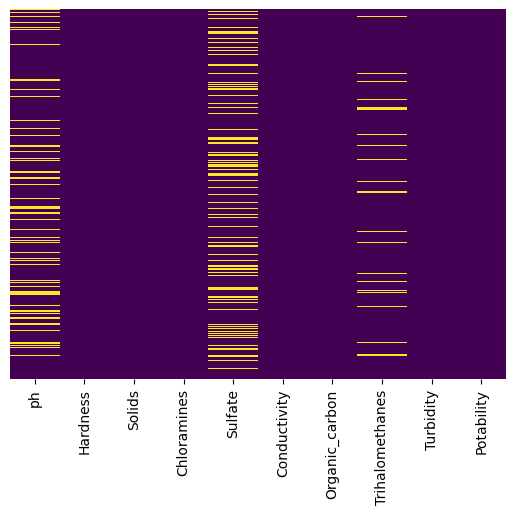

In [69]:
import matplotlib.pyplot as plt     #visualizing null values
sns.heatmap(water_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')
plt.show()   #visualizing null values


<Axes: ylabel='Frequency'>

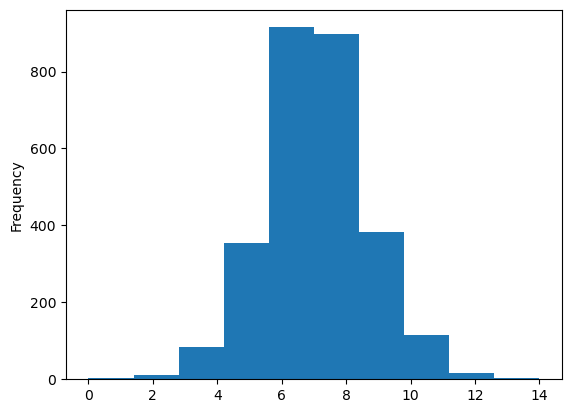

In [70]:
water_data['ph'].plot(kind = 'hist')  #checking the distributiion of ph

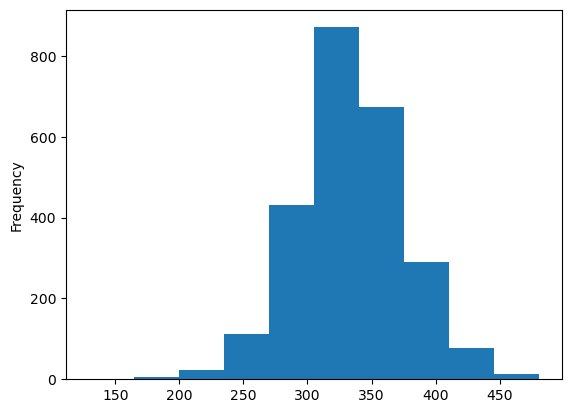

In [71]:
import matplotlib.pyplot as plt     #checking the distribution of sulfate
water_data['Sulfate'].plot(kind = 'hist')
plt.show()

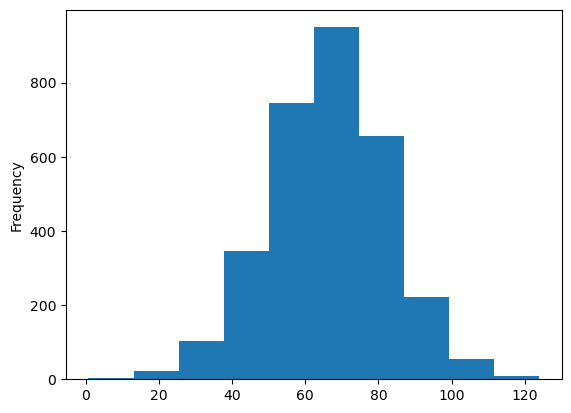

In [72]:
import matplotlib.pyplot as plt     #checking the distribution of trihalomethanes
water_data['Trihalomethanes'].plot(kind='hist')
plt.show()

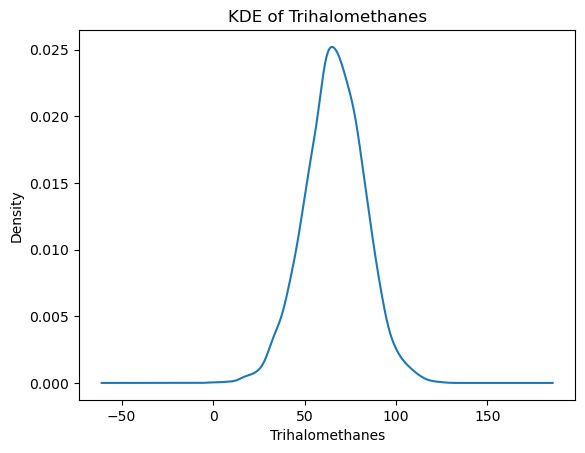

In [73]:
import matplotlib.pyplot as plt  #checking kde plot for trihalomethanes

# KDE Plot for the 'Trihalomethanes' column
fig = plt.figure()
ax = fig.add_subplot(111)

# Ensure there are no NaN values in the column (KDE cannot handle NaNs)
water_data['Trihalomethanes'].dropna().plot(kind='kde', ax=ax)

# Optional: Add labels and title
ax.set_title('KDE of Trihalomethanes')
ax.set_xlabel('Trihalomethanes')

plt.show()
#KDE (Kernel Density Estimation) shows the smooth probability distribution.

In [74]:
water_data['ph'] = water_data['ph'].fillna(water_data['ph'].mean())    #checking for null values after removing null values
water_data['Trihalomethanes'] = water_data['Trihalomethanes'].fillna(water_data['Trihalomethanes'].mean())
water_data['Sulfate'] = water_data['Sulfate'].fillna(water_data['Sulfate'].mean())
#Fills missing values with column mean.

In [75]:
water_data.isnull().sum()

ph                 0
Hardness           0
Solids             0
Chloramines        0
Sulfate            0
Conductivity       0
Organic_carbon     0
Trihalomethanes    0
Turbidity          0
Potability         0
dtype: int64

In [76]:
corr_matrix = water_data.corr()      
corr_matrix
#Shows relationships between variables.

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,1.000000,0.075833,-0.081884,-0.031811,0.014403,0.017192,0.040061,0.002994,-0.036222,-0.003287
Hardness,0.075833,1.000000,-0.046899,-0.030054,-0.092766,-0.023915,0.003610,-0.012690,-0.014449,-0.013837
Solids,-0.081884,-0.046899,1.000000,-0.070148,-0.149840,0.013831,0.010242,-0.008875,0.019546,0.033743
Chloramines,-0.031811,-0.030054,-0.070148,1.000000,0.023791,-0.020486,-0.012653,0.016627,0.002363,0.023779
Sulfate,0.014403,-0.092766,-0.149840,0.023791,1.000000,-0.014059,0.026909,-0.025605,-0.009790,-0.020619
Conductivity,0.017192,-0.023915,0.013831,-0.020486,-0.014059,1.000000,0.020966,0.001255,0.005798,-0.008128
Organic_carbon,0.040061,0.003610,0.010242,-0.012653,0.026909,0.020966,1.000000,-0.012976,-0.027308,-0.030001
Trihalomethanes,0.002994,-0.012690,-0.008875,0.016627,-0.025605,0.001255,-0.012976,1.000000,-0.021502,0.006960
Turbidity,-0.036222,-0.014449,0.019546,0.002363,-0.009790,0.005798,-0.027308,-0.021502,1.000000,0.001581
Potability,-0.003287,-0.013837,0.033743,0.023779,-0.020619,-0.008128,-0.030001,0.006960,0.001581,1.000000


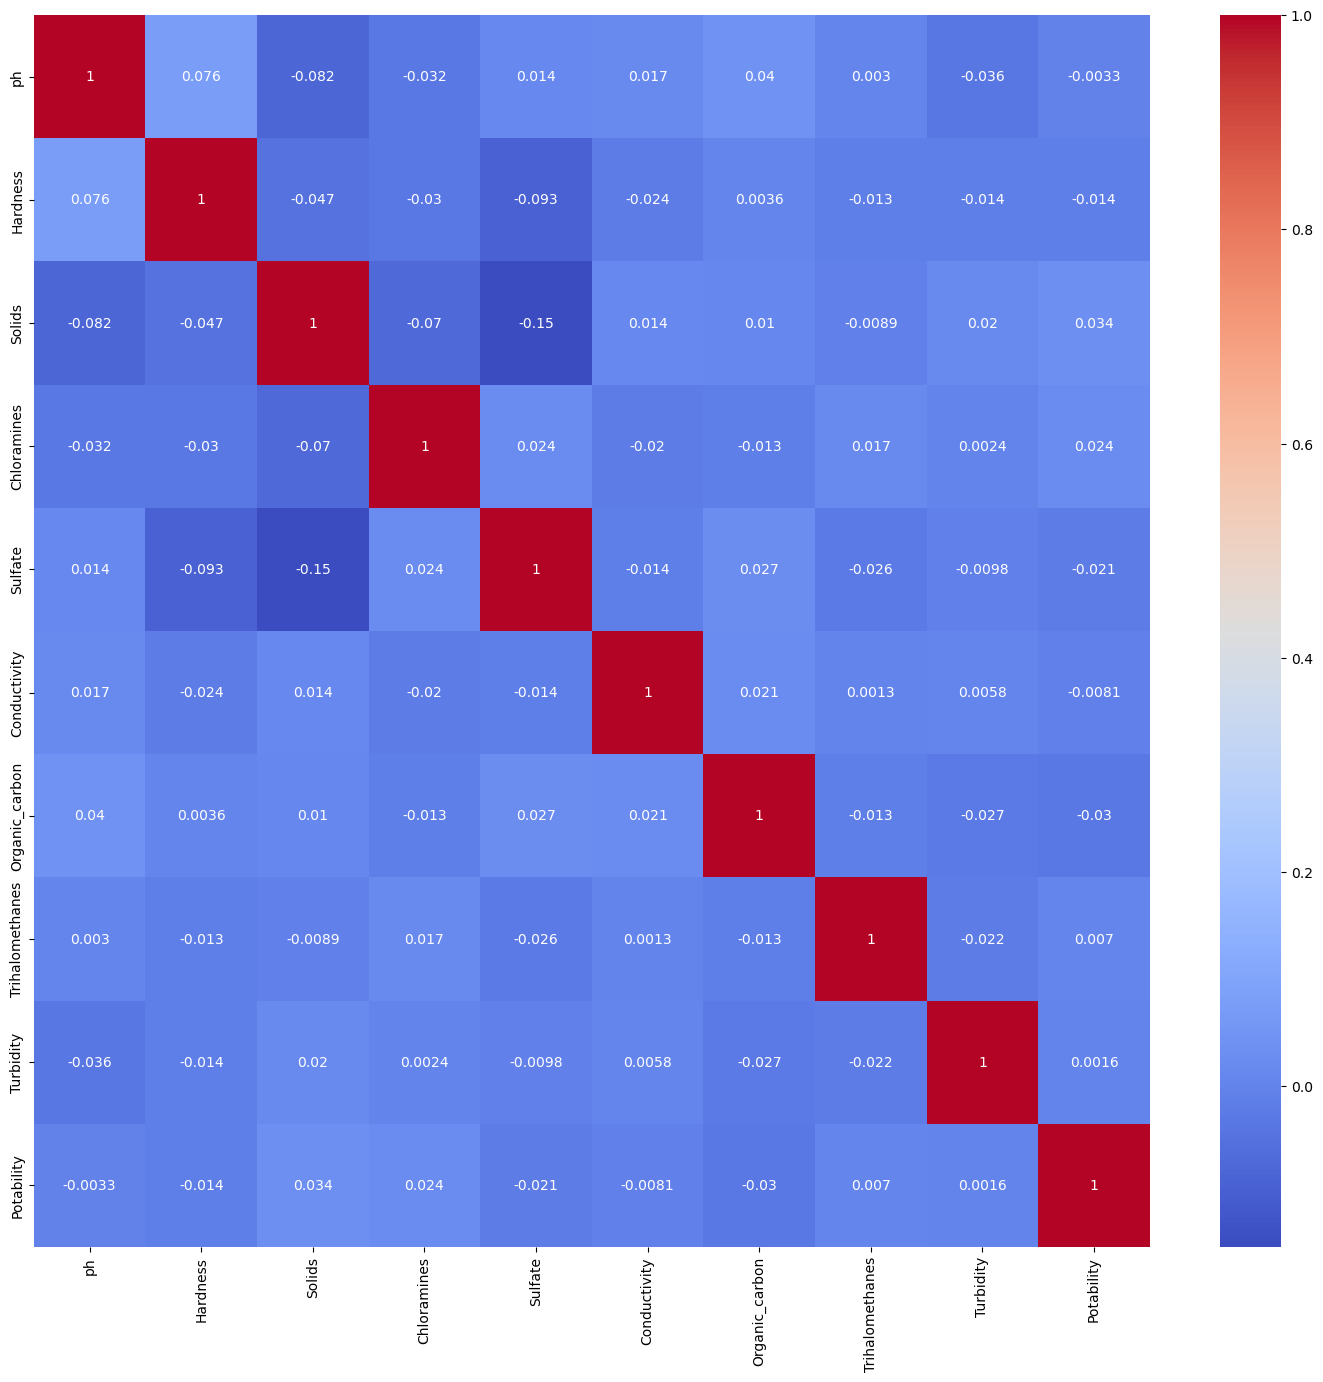

In [77]:
plt.figure(figsize=(18,16))     #visualizing correlations
sns.heatmap(corr_matrix,annot=True,cmap='coolwarm')
plt.show()

In [78]:
import numpy as np
corr_matrix1 = corr_matrix.abs()
upper_tri = corr_matrix1.where(np.triu(np.ones(corr_matrix1.shape),k=1).astype(np.bool_))
upper_tri

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity,Potability
ph,NaN,0.075833,0.081884,0.031811,0.014403,0.017192,0.040061,0.002994,0.036222,0.003287
Hardness,NaN,NaN,0.046899,0.030054,0.092766,0.023915,0.003610,0.012690,0.014449,0.013837
Solids,NaN,NaN,NaN,0.070148,0.149840,0.013831,0.010242,0.008875,0.019546,0.033743
Chloramines,NaN,NaN,NaN,NaN,0.023791,0.020486,0.012653,0.016627,0.002363,0.023779
Sulfate,NaN,NaN,NaN,NaN,NaN,0.014059,0.026909,0.025605,0.009790,0.020619
Conductivity,NaN,NaN,NaN,NaN,NaN,NaN,0.020966,0.001255,0.005798,0.008128
Organic_carbon,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.012976,0.027308,0.030001
Trihalomethanes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.021502,0.006960
Turbidity,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.001581
Potability,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<Axes: >

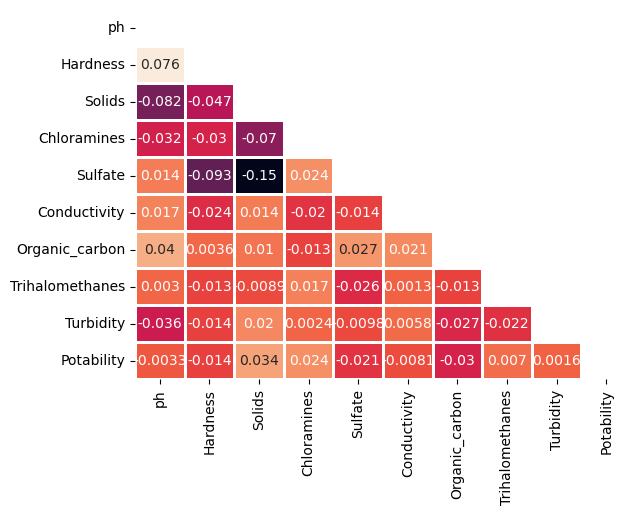

In [79]:
matrix = np.triu(corr_matrix)
sns.heatmap(water_data.corr(),annot=True,linewidths=.8,mask=matrix,cmap="rocket",cbar=False)

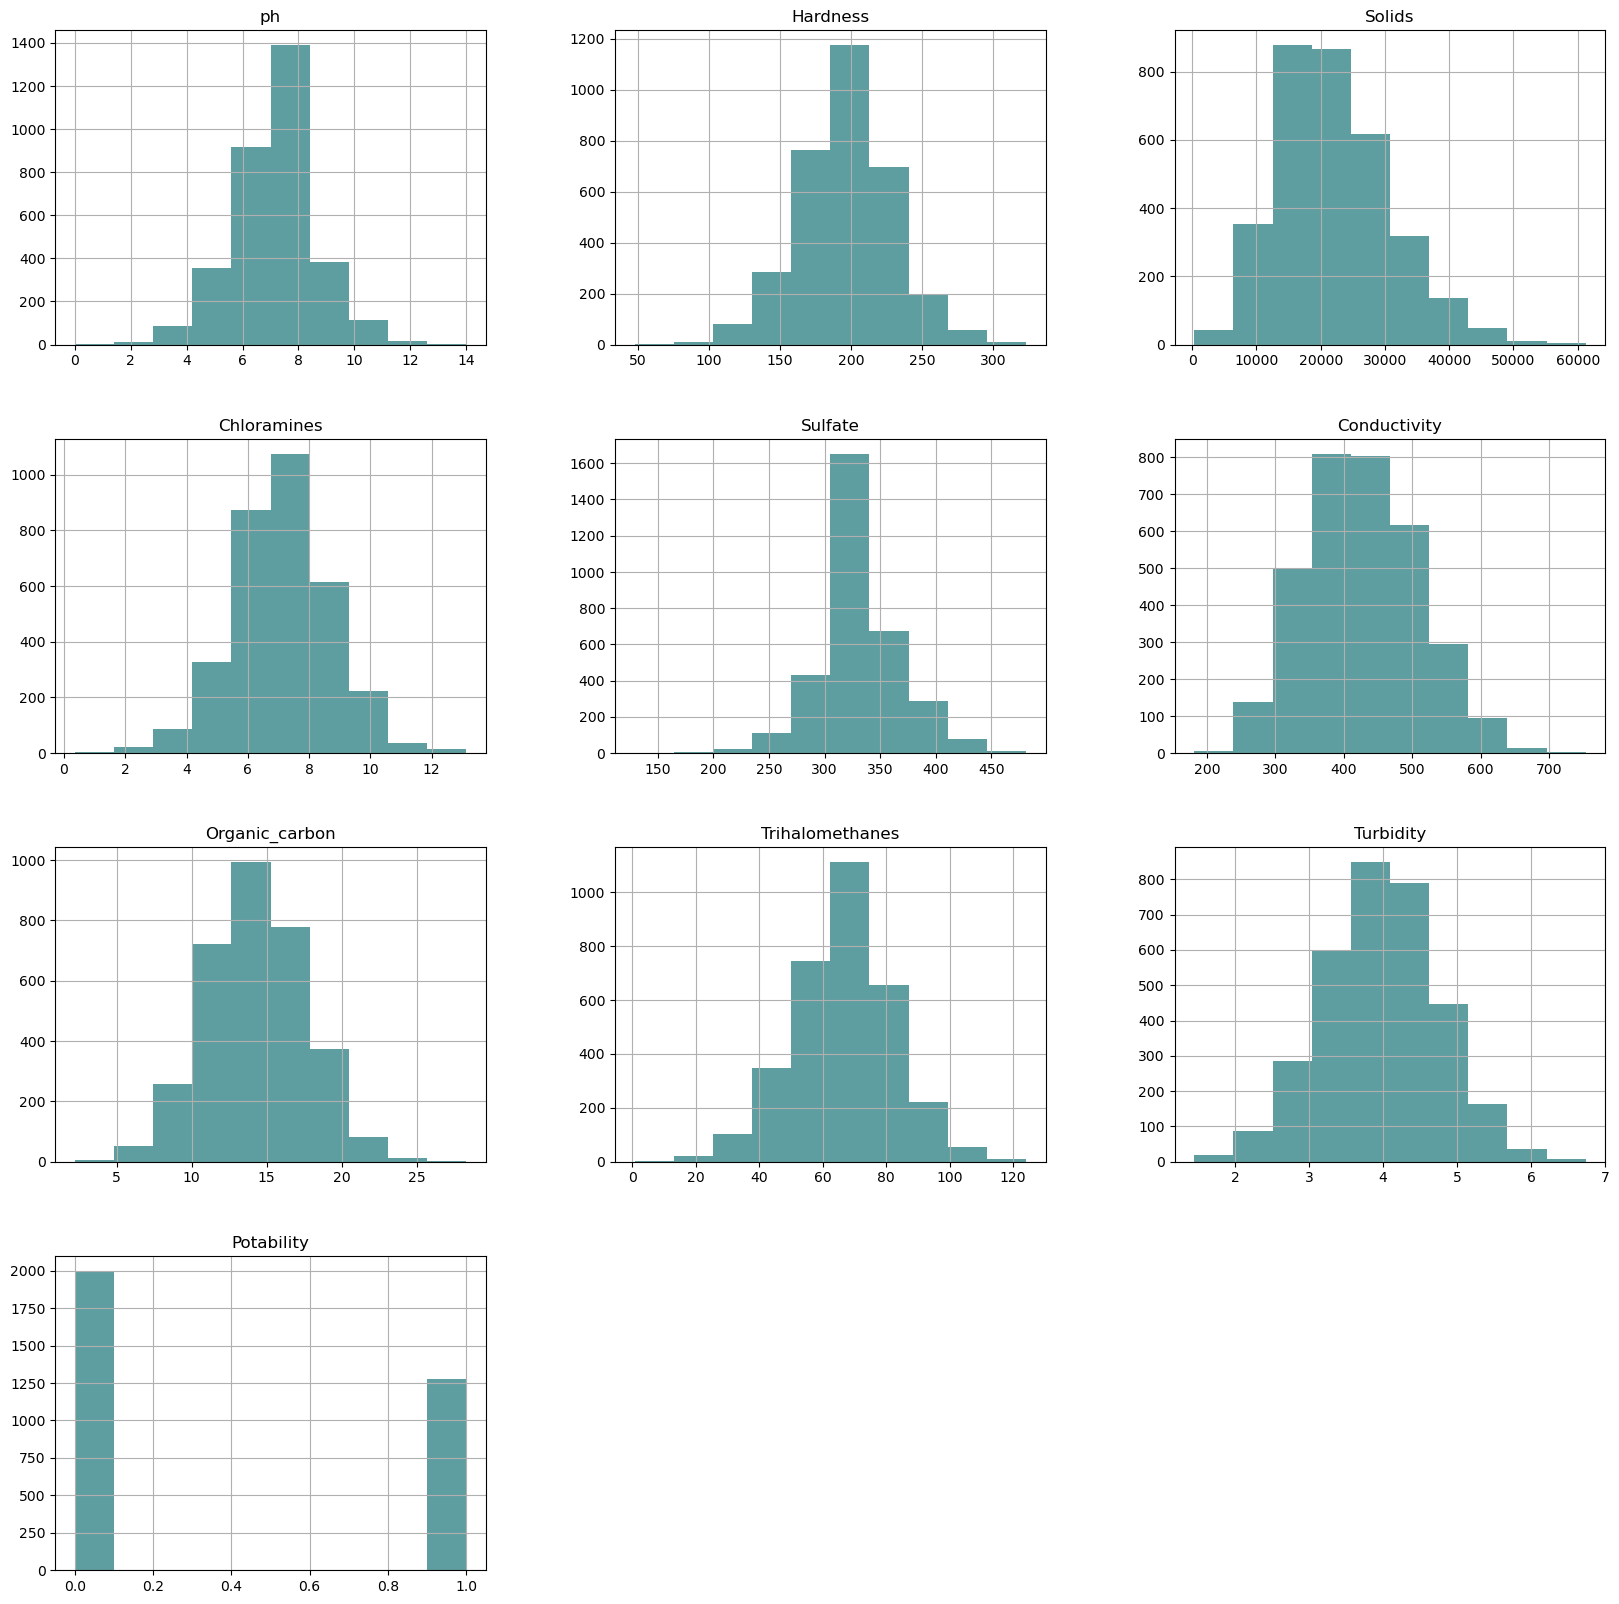

In [80]:
data_hist_plot =water_data.hist(figsize=(20,20),color = "#5F9EA0")

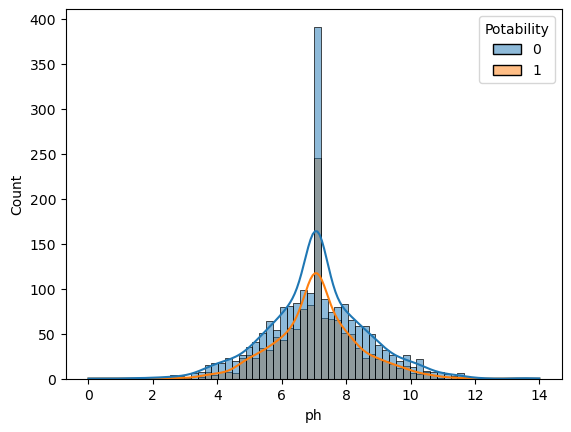

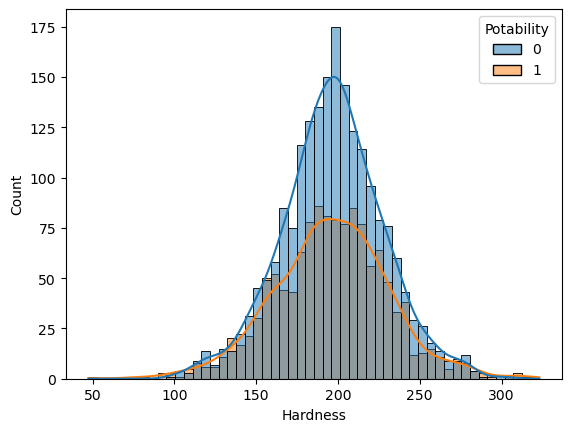

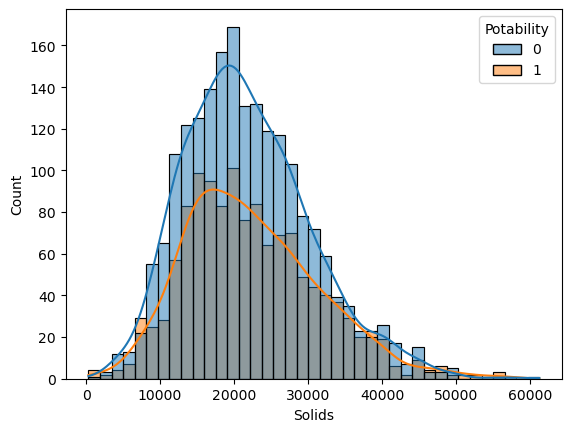

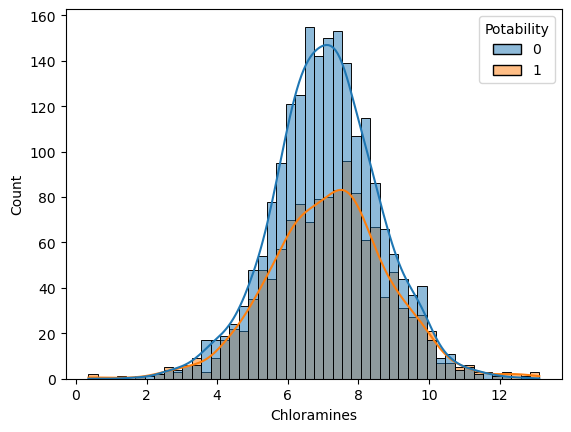

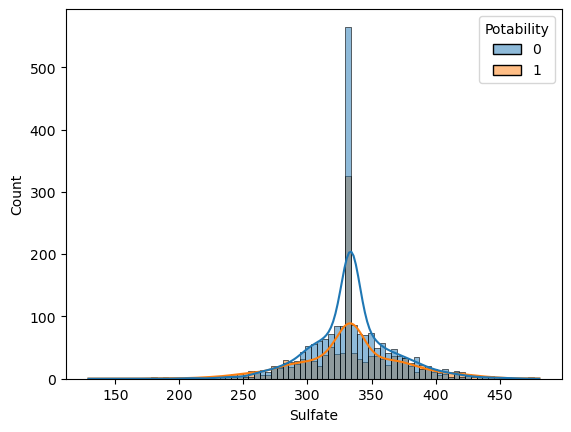

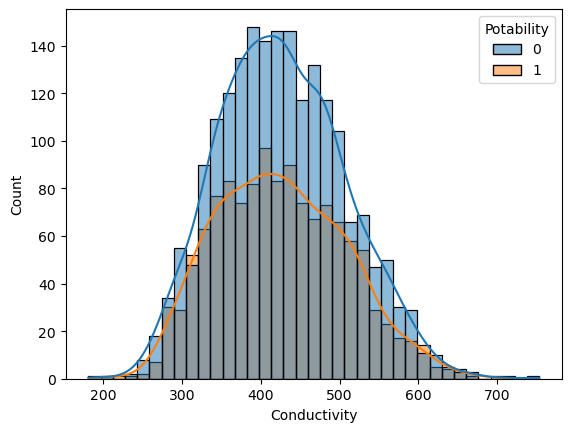

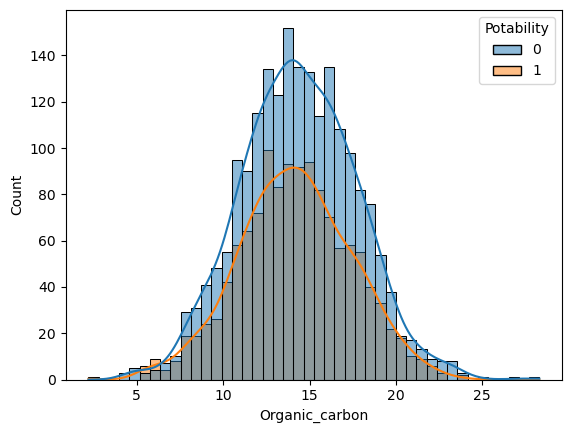

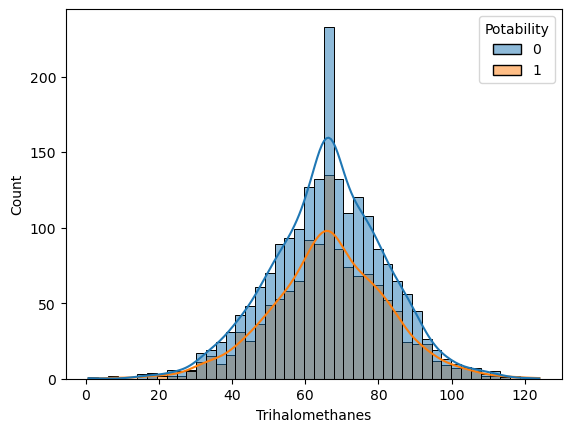

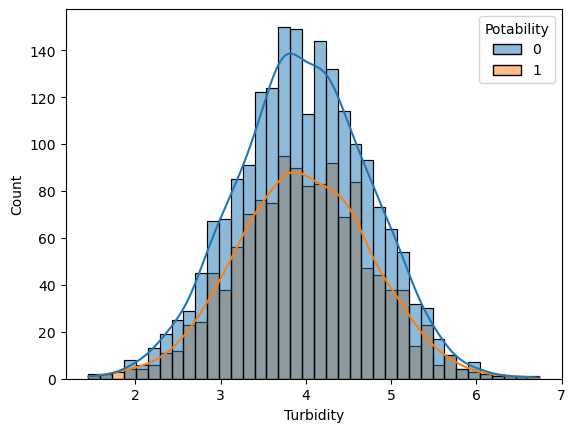

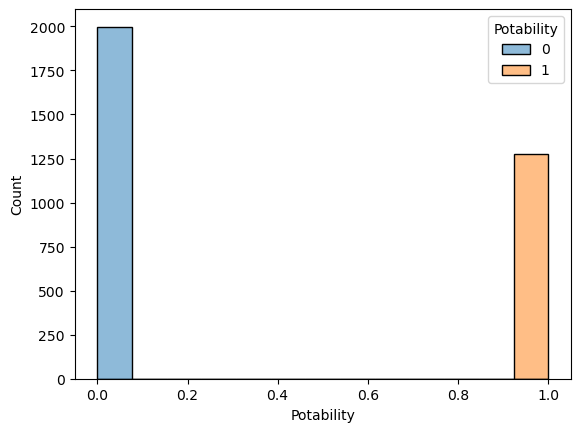

In [81]:
for col in water_data.columns:
    sns.histplot(data=water_data,x=col,kde=True,hue='Potability')
    plt.show()

In [82]:
water_data.groupby('Potability').mean().T
#Shows average value of each feature for potable and non-potable water.

Potability,0,1
ph,7.084658,7.074754
Hardness,196.733292,195.800744
Solids,21777.490788,22383.991018
Chloramines,7.092175,7.169338
Sulfate,334.371700,332.844122
Conductivity,426.730454,425.383800
Organic_carbon,14.364335,14.160893
Trihalomethanes,66.308522,66.533513
Turbidity,3.965800,3.968328


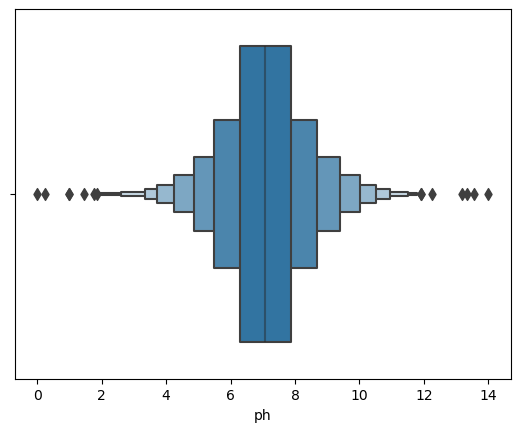

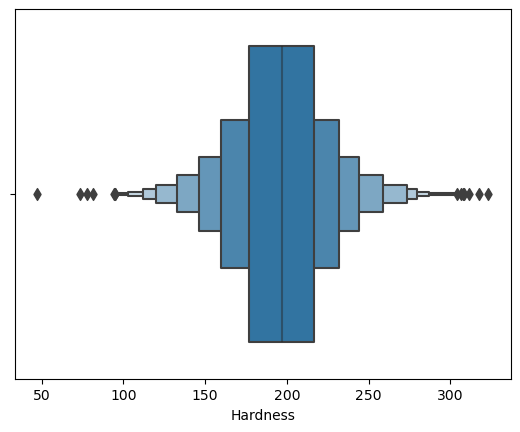

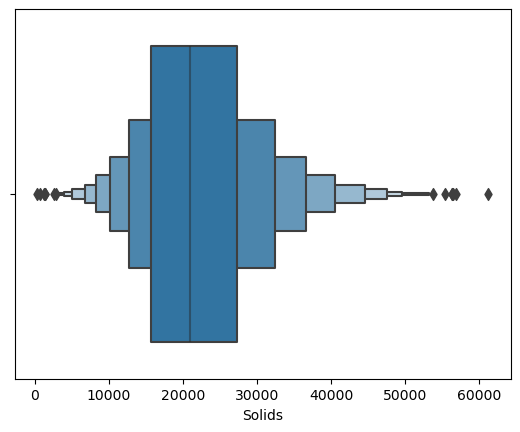

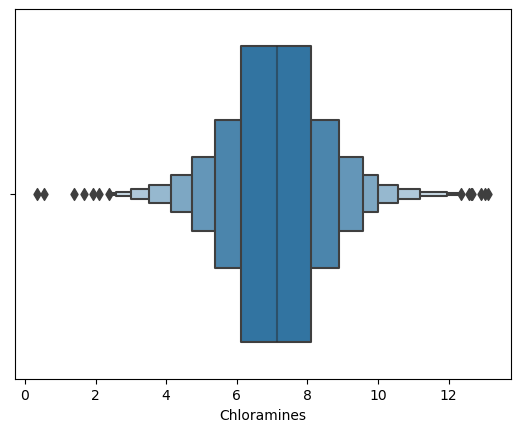

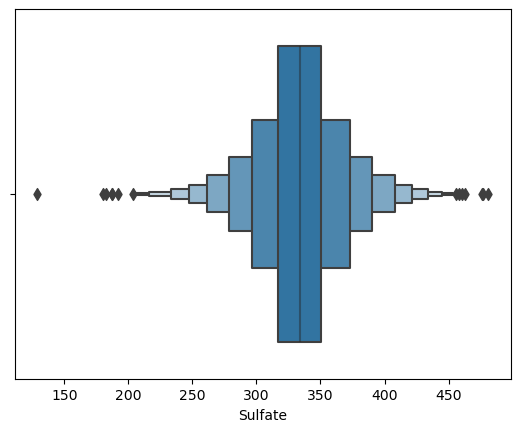

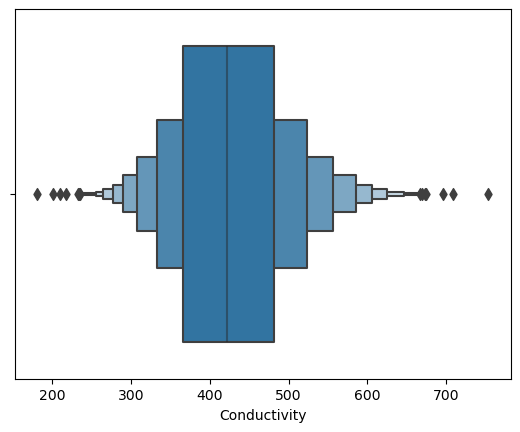

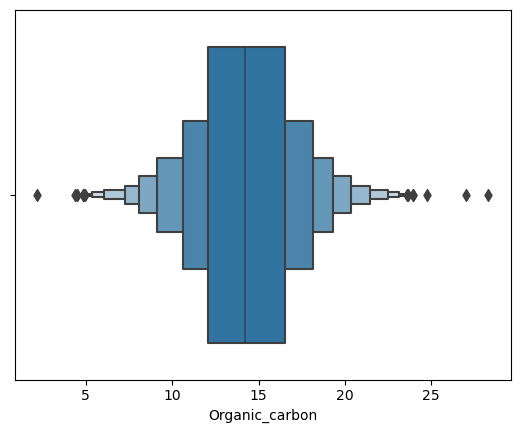

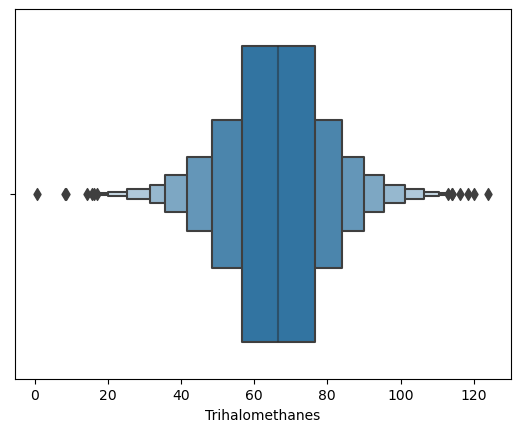

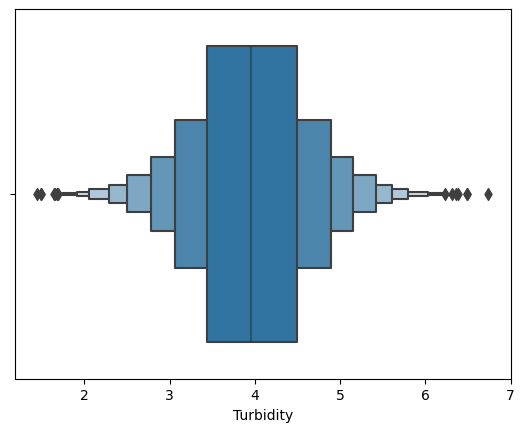

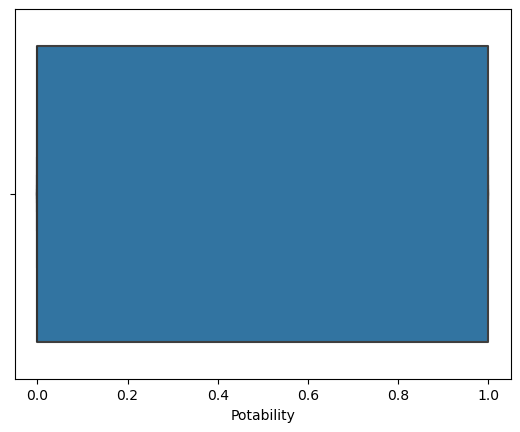

In [83]:
for col in water_data.columns:
    sns.boxenplot(data=water_data,x=col)
    plt.show()
    #Useful for spotting outliers and feature distribution.

<Axes: ylabel='count'>

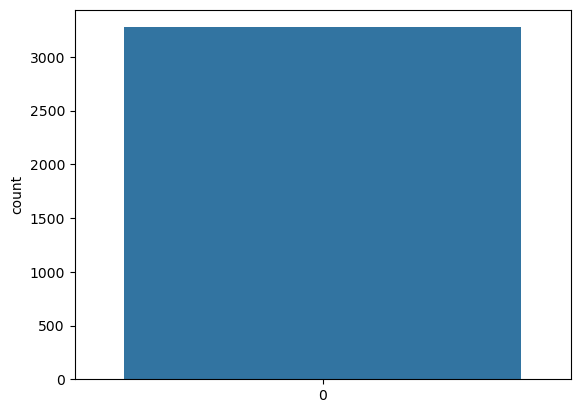

In [84]:
sns.countplot(water_data['Potability'])
#Shows class distribution (imbalanced?).

In [85]:
X = water_data.drop('Potability',axis=1)
Y = water_data['Potability']

In [86]:
X.head()

,ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_carbon,Trihalomethanes,Turbidity
0,7.080795,204.890455,20791.318981,7.300212,368.516441,564.308654,10.379783,86.990970,2.963135
1,3.716080,129.422921,18630.057858,6.635246,333.775777,592.885359,15.180013,56.329076,4.500656
2,8.099124,224.236259,19909.541732,9.275884,333.775777,418.606213,16.868637,66.420093,3.055934
3,8.316766,214.373394,22018.417441,8.059332,356.886136,363.266516,18.436524,100.341674,4.628771
4,9.092223,181.101509,17978.986339,6.546600,310.135738,398.410813,11.558279,31.997993,4.075075


In [87]:
Y.head()

0    0
1    0
2    0
3    0
4    0
Name: Potability, dtype: int64

In [88]:
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
#Normalizes features to mean=0 and std=1.

In [89]:
X_Scaled =std_scaler.fit_transform(X)
X_Scaled

array([[-6.04313345e-16,  2.59194711e-01, -1.39470871e-01, ...,
        -1.18065057e+00,  1.30614943e+00, -1.28629758e+00],
       [-2.28933938e+00, -2.03641367e+00, -3.85986650e-01, ...,
         2.70597240e-01, -6.38479983e-01,  6.84217891e-01],
       [ 6.92867789e-01,  8.47664833e-01, -2.40047337e-01, ...,
         7.81116857e-01,  1.50940884e-03, -1.16736546e+00],
       ...,
       [ 1.59125368e+00, -6.26829230e-01,  1.27080989e+00, ...,
        -9.81329234e-01,  2.18748247e-01, -8.56006782e-01],
       [-1.32951593e+00,  1.04135450e+00, -1.14405809e+00, ...,
        -9.42063817e-01,  7.03468419e-01,  9.50797383e-01],
       [ 5.40150905e-01, -3.85462310e-02, -5.25811937e-01, ...,
         5.60940070e-01,  7.80223466e-01, -2.12445866e+00]])

In [90]:
from sklearn.model_selection import train_test_split

X_train, X_test, Y_train, Y_test = train_test_split(
    X, Y,
    test_size=0.2,           # 20% test data
    random_state=42,         # reproducibility
    stratify=Y               # maintain class balance
)


In [91]:
X_train.shape,X_test.shape

((2620, 9), (656, 9))

In [92]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import AdaBoostClassifier

In [93]:
LR = LogisticRegression()
DT = DecisionTreeClassifier()
RF = RandomForestClassifier()
ETC = ExtraTreesClassifier()
SVM = SVC()
KNN = KNeighborsClassifier()
GBC = AdaBoostClassifier()
ABC = AdaBoostClassifier()
NB = GaussianNB()

In [94]:
from sklearn.model_selection import cross_val_score


In [95]:
from sklearn.model_selection import cross_val_score

models = [LR, DT, RF, ETC, SVM, KNN, GBC, ABC, NB]
features = X_Scaled
labels = Y
CV = 5
accu_list = []
ModelName = []



for model in models:
    model_name = model.__class__.__name__  # fixed line
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv= CV)
    accu_list.append(accuracies.mean() * 100)
    ModelName.append(model_name)
model_acc_df = pd.DataFrame({"Model": ModelName,"Cross_val_Accuracy":accu_list})
model_acc_df
#Compares performance of different models using 5-fold CV.

,Model,Cross_val_Accuracy
0,LogisticRegression,61.019549
1,DecisionTreeClassifier,57.663005
2,RandomForestClassifier,64.163982
3,ExtraTreesClassifier,63.706200
4,SVC,65.080339
5,KNeighborsClassifier,59.340579
6,AdaBoostClassifier,59.249488
7,AdaBoostClassifier,59.249488
8,GaussianNB,61.263871


In [96]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler

# Step 1: Separate features and labels
X = water_data.drop('Potability', axis=1)
Y = water_data['Potability']

# Step 2: Impute missing values in features
imputer = SimpleImputer(strategy='mean')  # or 'median'
X_imputed = imputer.fit_transform(X)

# Step 3: Scale the features
scaler = StandardScaler()
X_Scaled = scaler.fit_transform(X_imputed)


In [97]:
from sklearn.model_selection import cross_val_score

models = [LR, DT, RF, ETC, SVM, KNN, GBC, ABC, NB]
features = X_Scaled
labels = Y
CV = 5
accu_list = []
ModelName = []

for model in models:
    model_name = model.__class__.__name__
    accuracies = cross_val_score(model, features, labels, scoring='accuracy', cv=CV)
    accu_list.append(accuracies.mean() * 100)
    ModelName.append(model_name)

model_acc_df = pd.DataFrame({"Model": ModelName, "Cross_val_Accuracy": accu_list})
model_acc_df


,Model,Cross_val_Accuracy
0,LogisticRegression,61.019549
1,DecisionTreeClassifier,57.479240
2,RandomForestClassifier,62.973655
3,ExtraTreesClassifier,63.095839
4,SVC,65.080339
5,KNeighborsClassifier,59.340579
6,AdaBoostClassifier,59.249488
7,AdaBoostClassifier,59.249488
8,GaussianNB,61.263871


In [98]:
from sklearn.metrics import classification_report


In [99]:
from sklearn.impute import SimpleImputer

# Create the imputer and apply it to the feature data
imputer = SimpleImputer(strategy='mean')  # or 'median', 'most_frequent'
X_imputed = imputer.fit_transform(X)  # Impute original X before train-test split

# Proceed with train-test split again
from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(X_imputed, Y, test_size=0.2, random_state=42)

# Scale the imputed data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [100]:
from sklearn.metrics import classification_report

# Train models
SVM.fit(X_train, Y_train)
ETC.fit(X_train, Y_train)
RF.fit(X_train, Y_train)

# Predict
Y_pred_svm = SVM.predict(X_test)
Y_pred_etc = ETC.predict(X_test)
Y_pred_rf = RF.predict(X_test)

# Evaluate
print("Support Vector Machine Classification Report:")
print(classification_report(Y_test, Y_pred_svm))

print("\nExtra Trees Classifier Classification Report:")
print(classification_report(Y_test, Y_pred_etc))

print("\nRandom Forest Classification Report:")
print(classification_report(Y_test, Y_pred_rf))


Support Vector Machine Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.92      0.79       412
           1       0.70      0.32      0.44       244

    accuracy                           0.70       656
   macro avg       0.70      0.62      0.61       656
weighted avg       0.70      0.70      0.66       656


Extra Trees Classifier Classification Report:
              precision    recall  f1-score   support

           0       0.68      0.89      0.77       412
           1       0.62      0.31      0.41       244

    accuracy                           0.67       656
   macro avg       0.65      0.60      0.59       656
weighted avg       0.66      0.67      0.64       656


Random Forest Classification Report:
              precision    recall  f1-score   support

           0       0.69      0.87      0.77       412
           1       0.61      0.35      0.45       244

    accuracy                           0.68       6

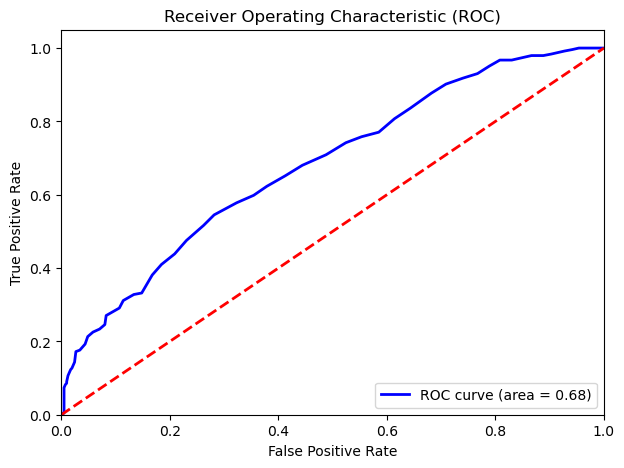

In [101]:
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Predict probabilities for ROC
Y_score = ETC.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC
fpr, tpr, threshold = roc_curve(Y_test, Y_score)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(7, 5))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='red', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.show()


In [102]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier

# Define hyperparameters
params_RF = {
    "min_samples_split": [2, 6],
    "min_samples_leaf": [1, 4],
    "n_estimators": [100, 200, 300],
    "criterion": ["gini", "entropy"]
}

# Cross-validation method
cv_method = StratifiedKFold(n_splits=3)

# Grid Search
GridSearchCV_RF = GridSearchCV(
    estimator=RandomForestClassifier(),
    param_grid=params_RF,
    cv=cv_method,
    verbose=1,
    n_jobs=2,
    scoring="accuracy",
    return_train_score=True
)

# Fit model
GridSearchCV_RF.fit(X_train, Y_train)

# Best parameters
best_params_RF = GridSearchCV_RF.best_params_
print("Best Hyperparameters for Random Forest are =", best_params_RF)


Fitting 3 folds for each of 24 candidates, totalling 72 fits
Best Hyperparameters for Random Forest are = {'criterion': 'gini', 'min_samples_leaf': 4, 'min_samples_split': 2, 'n_estimators': 100}


In [103]:
best_estimator = GridSearchCV_RF.best_estimator_
best_estimator.fit(X_train,Y_train)
Y_pred_best = best_estimator.predict(X_test)
print(classification_report(Y_test,Y_pred_best))

              precision    recall  f1-score   support

           0       0.70      0.90      0.79       412
           1       0.67      0.34      0.45       244

    accuracy                           0.69       656
   macro avg       0.68      0.62      0.62       656
weighted avg       0.69      0.69      0.66       656



In [104]:
from sklearn.metrics import accuracy_score

# Get the best estimator from GridSearchCV
best_rf_model = GridSearchCV_RF.best_estimator_

# Predict on the test set
Y_pred_best = best_rf_model.predict(X_test)

# Print accuracy
print(f"Accuracy of Random Forest Model = {round(accuracy_score(Y_test, Y_pred_best)*100, 2)}%")


Accuracy of Random Forest Model = 69.21%


In [105]:
water_data.columns


Index(['ph', 'Hardness', 'Solids', 'Chloramines', 'Sulfate', 'Conductivity',
       'Organic_carbon', 'Trihalomethanes', 'Turbidity', 'Potability'],
      dtype='object')

In [106]:
list1 = water_data.iloc[2:3,0:9].values.flatten().tolist()
list1

[8.099124189298397,
 224.23625939355776,
 19909.541732292397,
 9.275883602694089,
 333.7757766108135,
 418.6062130644815,
 16.868636929550973,
 66.42009251176368,
 3.0559337496641685]

In [107]:
ph = float(input('Enter the Ph Value = '))
Hardness = float(input('Enter the Hardness Value = '))
Solids = float(input('Enter the Solids Value = '))
Chloramines = float(input('Enter the Chloramines Value = '))
Sulfate = float(input('Enter the Sulfate Value = '))
Conductivity = float(input('Enter the Conductivity Value = '))
Organic_Carbon = float(input('Enter Organic Carbon Value = '))
Trihalomethanes = float(input('Enter the Trihalomethanes Value = '))
Turbidity = float(input('Enter the Turbidity Value = '))




In [108]:
input_data = [ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_Carbon,Trihalomethanes,Turbidity]

In [109]:
water_data_input = std_scaler.transform([[ph,Hardness,Solids,Chloramines,Sulfate,Conductivity,Organic_Carbon,Trihalomethanes,Turbidity]])
water_data_input

array([[-0.39517045, -2.93141445, -1.37034037, -1.97257485, -2.31827643,
         0.91317055, -1.90012754, -0.40566376, -1.87986053]])

In [110]:
model_prediction = best_estimator.predict(water_data_input)
model_prediction

array([1], dtype=int64)

In [111]:
if model_prediction[0] == 0:
    print("Water is Not SAFE for Consumption")
else:
    print("Water is SAFE for Consumption")

Water is SAFE for Consumption
